# Problem definition E-Commerce Data

**Problem definition START**

This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [3]:
import pandas as pd
retail = pd.read_csv("online_retail.csv")
retail.head(100)

InvoiceNo StockCode  ... CustomerID         Country
0     536365    85123A  ...    17850.0  United Kingdom
1     536365     71053  ...    17850.0  United Kingdom
2     536365    84406B  ...    17850.0  United Kingdom
3     536365    84029G  ...    17850.0  United Kingdom
4     536365    84029E  ...    17850.0  United Kingdom
..       ...       ...  ...        ...             ...
95    536378     22352  ...    14688.0  United Kingdom
96    536378     21212  ...    14688.0  United Kingdom
97    536378     21975  ...    14688.0  United Kingdom
98    536378     21977  ...    14688.0  United Kingdom
99    536378     84991  ...    14688.0  United Kingdom

[100 rows x 8 columns]

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Negative order quantities indicate returns. Which products have been returned the most?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

Problem definition END -------------------------------------------------------------------------------------------------------------------------------

# Problem solving sections
## Problem 1´) Which products have been returned the most?
It is important to differentiate returns and related refundings from purchases. Total income includes refunded amounts or we can calculate (negative) refunds and (positive) incomes separately.

As first step total database size, total number of returns and percentage compared to total event number is calculated (printed in two different ways).

To determine the most returned products (itemcodes) unique (identifying) values of returned products ('StockCode') is determined besides of the amount of unique itemcodes and amount of (unique) returned itemcodes in the complete dataset.

dataframe.info() as a built in method of dataframes gives some key information on the full dataset.

(Note: the notebook has an in-built automatic presentation option for calculated values in form of a table or as a graph)

In [16]:
#import pandas as pd
#retail = pd.read_csv("online_retail.csv")
database_size = len(retail)
print('Database size: ' + str(database_size))
#retail.colums.to_list() #not accessible in this environment
returns = len(retail[retail['Quantity'] < 0])
percentage = returns/database_size*100
print(f'Returns: {returns}, {percentage} % of total')
print('Returns : %2d, percentage: %5.2f ' % (returns, percentage) + '%') 
count_total_unique = len(retail['StockCode'].unique())
count_returned_unique = len(retail[retail['Quantity'] < 0]['StockCode'].unique())
print('Number of unique itemcodes (in total): ' + str(count_total_unique))
print('Number of unique returned itemcodes: ' + str(count_returned_unique) + ' (' + '{:.1f}'.format(count_returned_unique / count_total_unique *100) + '%)')
n = 10
print('Top ' + str(n) + ' most appearing products\' itemcodes from ' +str(count_total_unique) + ':')
print(retail['StockCode'].value_counts()[:n].index.tolist())
print('-----------------------------------')
retail.info()

Database size: 541909
Returns: 10624, 1.9604767590130447 % of total
Returns : 10624, percentage:  1.96 %
Number of unique itemcodes (in total): 4070
Number of unique returned itemcodes: 2559 (62.9%)
Top 10 most appearing products' itemcodes from 4070:
['85123A', '22423', '85099B', '47566', '20725', '84879', '22720', '22197', '21212', '20727']
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We may extract returns related data from the entire dataset (to keep original dataframe intact and not to perform analysis on the entire dataset).

In [3]:
df_returns = retail[retail['Quantity'] < 0]
df_returns

InvoiceNo StockCode  ... CustomerID         Country
141      C536379         D  ...    14527.0  United Kingdom
154      C536383    35004C  ...    15311.0  United Kingdom
235      C536391     22556  ...    17548.0  United Kingdom
236      C536391     21984  ...    17548.0  United Kingdom
237      C536391     21983  ...    17548.0  United Kingdom
...          ...       ...  ...        ...             ...
540449   C581490     23144  ...    14397.0  United Kingdom
541541   C581499         M  ...    15498.0  United Kingdom
541715   C581568     21258  ...    15311.0  United Kingdom
541716   C581569     84978  ...    17315.0  United Kingdom
541717   C581569     20979  ...    17315.0  United Kingdom

[10624 rows x 8 columns]

Data can be sorted based on quantity in ascending order (by default) to show products returned in largest return amounts (lowest negative numbers).

In [10]:
df_returns[['StockCode', 'Description', 'Quantity']].sort_values('Quantity')

StockCode                          Description  Quantity
540422     23843          PAPER CRAFT , LITTLE BIRDIE    -80995
61624      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215
225529     23005         printing smudges/thrown away     -9600
225530     23005         printing smudges/thrown away     -9600
4287       84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360
...          ...                                  ...       ...
240697     22796        PHOTO FRAME 3 CLASSIC HANGING        -1
240696     23091           ZINC HERB GARDEN CONTAINER        -1
240694     82486    WOOD S/3 CABINET ANT WHITE FINISH        -1
242447         S                              SAMPLES        -1
249284         M                               Manual        -1

[10624 rows x 3 columns]

Remember that the previous sort shows the quantity values of all registers which all are treated unrelated in this case, however there might be multiple return-registers related to the same product type. See for example StockCode 23005. In such case the quantities defined in each of same product lines should be summed up.

First, group registers that are related to the same item ('StockCode') and then sum up returned quantities, finally sort based on quantities similarly, as above.

In [47]:
top_returns = df_returns.groupby('StockCode').sum('Quantity').sort_values('Quantity')
top_returns.iloc[:, 0:1]

Quantity
StockCode          
23843        -80995
23166        -74494
23005        -19201
84347         -9376
23003         -9058
...             ...
85065            -1
35921            -1
35832            -1
37488A           -1
23050            -1

[2559 rows x 1 columns]

However the list order for first 9 items did not change much, the most relevant change is that the returns of item 23005 has been summed up.

As next step, it is useful (in general) to know some details of the returned goods:
- total number of individual (unique) products
- the itemcode (list) of returned products

In [30]:
print('Number of product types returned: '+  str(len(retail[retail['Quantity'] < 0]['StockCode'].unique())))
retail[retail['Quantity'] < 0]['StockCode'].unique()

Number of product types returned: 2559


array(['D', '35004C', '22556', ..., '21508', '16219', '23843'],
      dtype=object)

Surprisingly there are single letter codes for some products. I wouldn't create such itemcodes.

There are different ways to list a portion of dataframe datasets, like using .head() or .bottom() functions, or like  this, using some condition:

In [31]:
n = 10
retail['StockCode'].value_counts()[retail['StockCode'].value_counts() >= retail['StockCode'].value_counts()[n-1]]

Database size: 541909


StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64

A line plot of the first 50 most times referred (frequent) product codes (and total number of registers):

Note: graph is made using the notebook automatic data presentation option, by selecting the appropriate dataframe columns for the corresponding axis.

In [3]:
n = 50
retail['StockCode'].value_counts()[:n] # [retail['StockCode'].value_counts() >= retail['Quantity'].value_counts()[n-1]]

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
22457     1280
23203     1267
POST      1256
22386     1251
22469     1239
22960     1229
21931     1214
22086     1210
22411     1202
20728     1197
22382     1192
22961     1182
22666     1180
23298     1179
22699     1138
22384     1137
23209     1135
82482     1129
22993     1111
22727     1107
22697     1085
23206     1084
22178     1072
20724     1068
23084     1067
20726     1061
22726     1026
21080     1015
23199     1009
22139      993
22077      986
22138      974
21034      967
22470      963
85099C     960
84946      946
21790      944
82494L     943
23301      937
Name: count, dtype: int64

Let's make a twist in the story. Let's combine the return case numbers (_returns_itemRegisterCounts_) and the total amount of returned products (per product type,  _returns_totalItemNumber_) data on one plot.

Before plotting let's make some double checks as 
- data number should be equal for the two sets
- it is better knowing the start and ending itemcode in the ordered list of itemcodes

In [69]:
returns_totalItemNumber = df_returns.groupby('StockCode').sum('Quantity').sort_values('StockCode') # calculated above but with Quantity sorting
print(len(returns_itemRegisterCounts), len(returns_totalItemNumber))
print(df_returns['StockCode'].min(), df_returns['StockCode'].max())
returns_totalItemNumber.iloc[:10,0]

2559 2559
10002 S


StockCode
10002       -3
10123C     -18
10123G     -38
10133      -92
10134      -19
10135       -1
11001     -185
15034    -1385
15036    -1274
15039      -26
Name: Quantity, dtype: int64

In [56]:
returns_itemRegisterCounts = df_returns.groupby('StockCode').count().sort_values('StockCode') 
returns_itemRegisterCounts.iloc[:, [2]] #['StockCode', 'Quantity']

Quantity
StockCode          
10002             1
10123C            1
10123G            1
10133             2
10134             1
...             ...
DCGS0074          1
DOT               1
M               244
POST            126
S                61

[2559 rows x 1 columns]

On the graph below returned product amounts (-1 * Quantity values to make values positive) are plotted against the number of returns of the corresponding products.

I use [matplotlib.pyplot]([url](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)) module as the notebook in-built plotter is n ot able to create XY-scatter plots.

In [68]:
import matplotlib.pyplot as plt # matplotlib_inline
%matplotlib inline

# Create a figure and axis
fig, ax = plt.subplots()
# Create a scatter plot
ax.scatter(returns_itemRegisterCounts.iloc[:, 2], -returns_totalItemNumber.iloc[:,0], marker='.')
# Set the title and labels
ax.set_title('Most returned goods (number of total returned vs number of returns)')
ax.set_xlabel('number of returns')
ax.set_ylabel('total number returned')
plt.legend()
# ready to show the result
plt.show()

**Conclusion**

The total number of returned goods versus number of returns (case numbers) scatter plot shows that the majority of the goods were rarely returned and in low amount, while there are extremities of few return cases with extreme amounts (top-left) and such items that a lot of people were not satisfied with (bottom-right). The previous case could be related to resellers ordering in large amount, but returning the goods. The itemcodes cannot be extracted from this scatter plot unfortunately, not knowing the alphanumerical order of product codes we could associate the points to the goods respectively.

Another option is to plot the product codes along the horizontal axis, vertical shows the amount of returns and the size of the spot on the plot refers (linearly proportional) to the total amount returned from the specific product. Unfortunately there are plenty of returned products, so different workarounds should be used to be able to read the code (and understand the plot at the same time). One option is to plot subset(s) of the complete dataset and then step by step move along the complete list.

The steps can be automatically made with some tricks ([updating plot]([url](https://www.geeksforgeeks.org/dynamically-updating-plot-in-matplotlib/)) ) or another graphical software module should be used. Note that the option to use labels for data points would also result in  crowded so unreadable labels if more than 100 datapoints are shown.

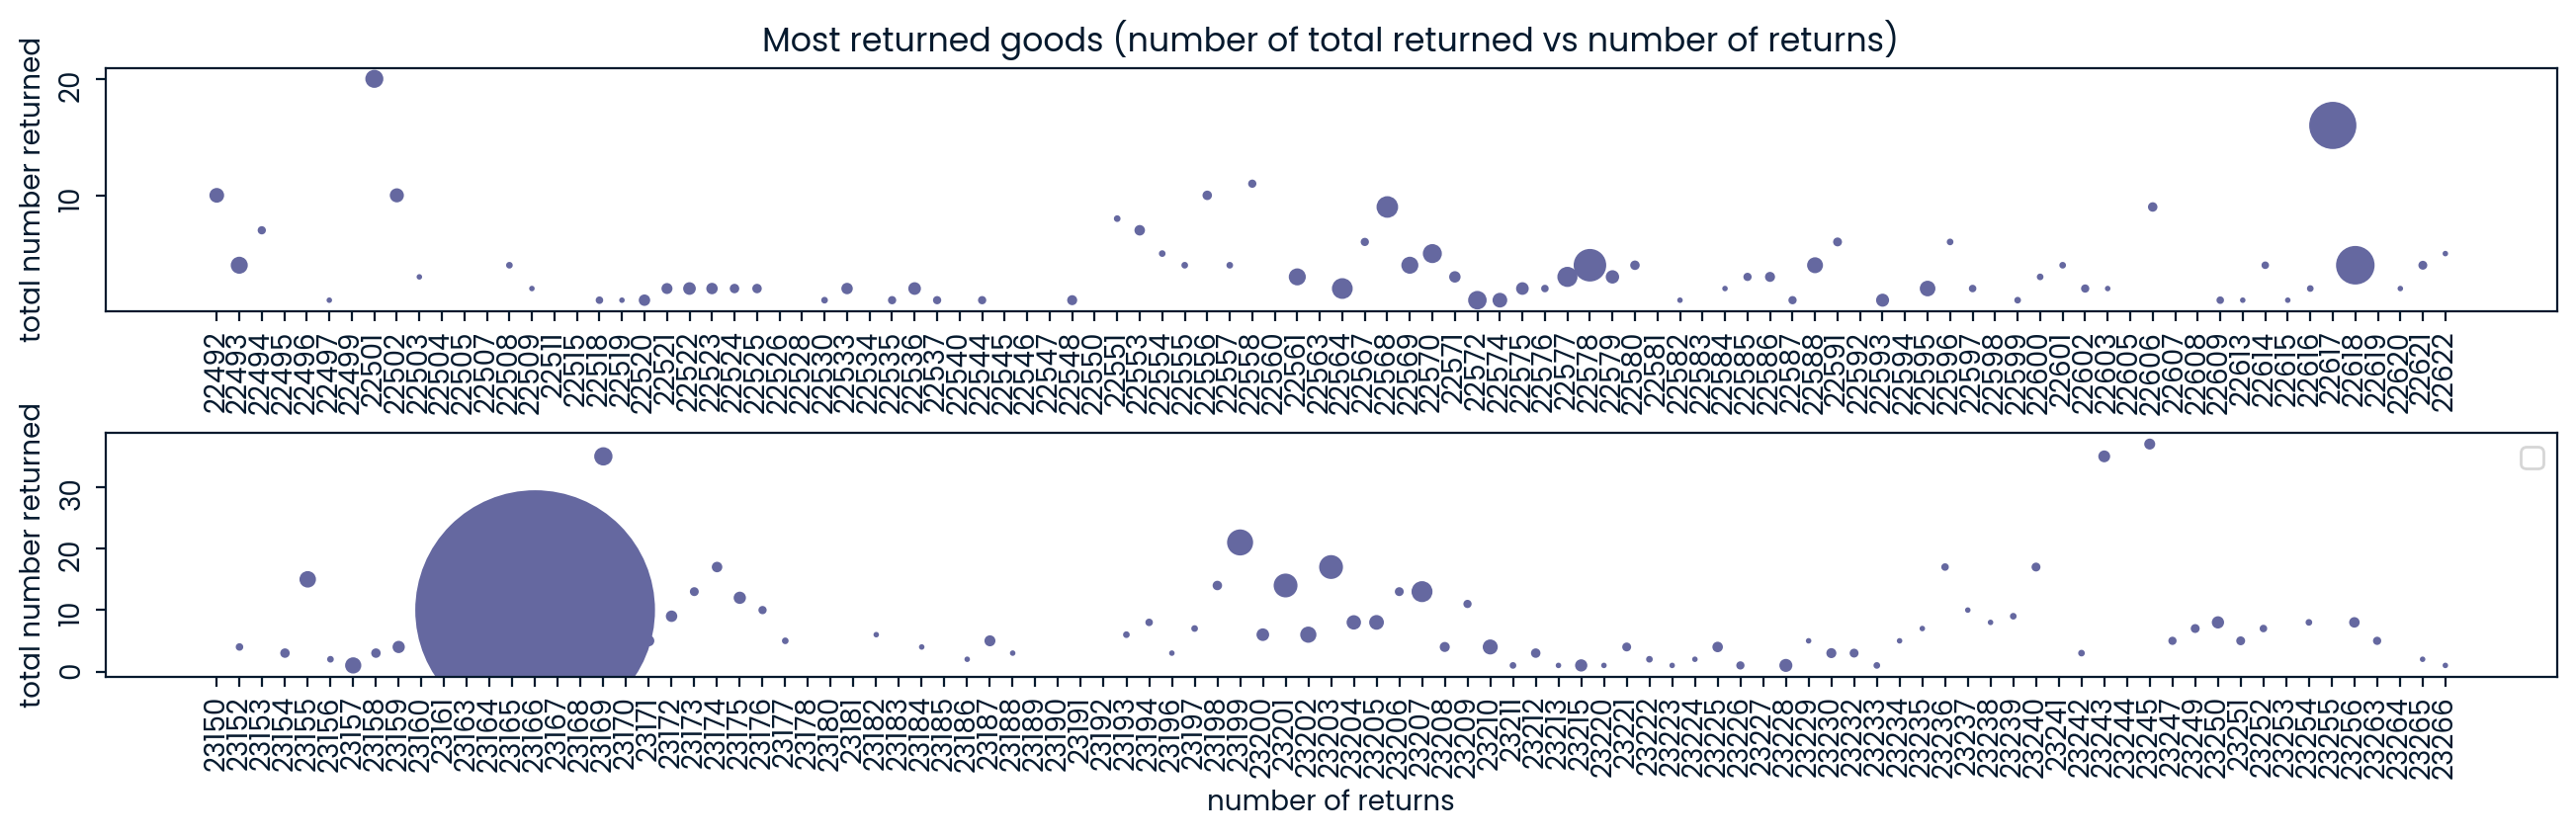

In [97]:
# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 4))
fig.subplots_adjust(hspace=0.5) # increase spacing between subplots
# Create 2 scatter plots from subsets of full dataset
ax1.scatter(returns_itemRegisterCounts.iloc[1000:1100, 0].index.to_list(), returns_itemRegisterCounts.iloc[1000:1100, 2], s = [int((-x)/10) for x in returns_totalItemNumber.iloc[1000:1100,0].to_list()] )#, -returns_totalItemNumber.iloc[:,0], marker='.', )
ax2.scatter(returns_itemRegisterCounts.iloc[1501:1600, 0].index.to_list(), returns_itemRegisterCounts.iloc[1501:1600, 2], s = [int((-x)/10) for x in returns_totalItemNumber.iloc[1501:1600,0].to_list()] )#, -returns_totalItemNumber.iloc[:,0], marker='.', )

# Set the title and labels
ax1.set_title('Most returned goods (number of total returned vs number of returns)')
ax2.set_xlabel('product codes')
ax1.set_ylabel('total number returned')
ax2.set_ylabel('total number returned')
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)
plt.legend()
plt.show()

## Conclusion 1)
- However there are so many items that plotting their data on one graph is not possible, but there are workarounds/solutions for this presentation problem.
- In regard the data original question, the list of most returned products have been extracted and shown in table and in graph formats in multiple ways.
- Additionally the frequency of returns and the total amount of returned products where also demonstrated and the conclusion is defined above. 

# Problem 2) Visualize: Create a plot visualizing the profits earned from UK customers weekly, monthly
Check dataframe properties, info ... first

In [98]:
print('Is there any empty field in Quantity data? ' + str(retail.Quantity.isnull().any())) # Is there any missing data?
print('Is there any empty field in UnitPrice data? ' + str(retail.UnitPrice.isnull().any()))
print('-------------------------------')
print(retail[retail.UnitPrice == 0].count())
print('-------------------------------------------')
retail.info()

Is there any empty field in Quantity data? False
Is there any empty field in UnitPrice data? False
-------------------------------
InvoiceNo      2515
StockCode      2515
Description    1061
Quantity       2515
InvoiceDate    2515
UnitPrice      2515
CustomerID       40
Country        2515
dtype: int64
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Determine start and end (+duration) of timeline of the given dataset.

Note: retail['InvoiceDate'] data is a STRING date format so this: min(retail['InvoiceDate']) does not give the earliest date, rather provides the 'smallest' ANSII character set!

In [101]:
retail['InvoiceDate'][0], retail['InvoiceDate'][len(retail['InvoiceDate'])-1]

('12/1/10 8:26', '12/9/11 12:50')

In [6]:
from datetime import datetime # date string to datetime conversion module for time plotting and data grouping purposes
#convert to datetime (date is enough!) , original string format: '%m/%d/%y %H:%M'
timeline = [datetime.strptime(t.split(' ')[0], '%m/%d/%y') for t in retail['InvoiceDate']] #  list comprehension
first_timepoint = datetime.strptime(retail['InvoiceDate'][0], '%m/%d/%y %H:%M')
#format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [7]:
time_limit_start = min(timeline)
time_limit_end = max(timeline)
#duration = time_limit_end - time_limit_start 
print('Database time limits: ' + str(time_limit_start) + ' - ' + str(time_limit_end))
unique_timeline_values = set(timeline)
time_limit_end2 = max(unique_timeline_values) # '9/9/11 9:52'
time_limit_start2 = min(unique_timeline_values) # '1/10/11 10:04'

print('InvoiceDate original format: '  + str(type(time_limit_start2))) # string ('str')
print('InvoiceDate converted datetime format: ' + str(first_timepoint) + ' (' + str(type(first_timepoint)) + ')') # printed in default format
print('InvoiceDate converted DATE format: ' + str(time_limit_start) + ' (' + str(type(time_limit_start)) + ')') # printed in default format
timeline = [datetime.strptime(t.split(' ')[0], '%m/%d/%y') for t in retail.InvoiceDate]
print(timeline[10])

Database time limits: 2010-12-01 00:00:00 - 2011-12-09 00:00:00
InvoiceDate original format: <class 'datetime.datetime'>
InvoiceDate converted datetime format: 2010-12-01 08:26:00 (<class 'datetime.datetime'>)
InvoiceDate converted DATE format: 2010-12-01 00:00:00 (<class 'datetime.datetime'>)
2010-12-01 00:00:00


Calculate (lists of)
- date_list: convert date strings to datetime
- item_income: daily (total) income, calculated values, sum of purchases and refunds : total
- return_refunds: daily sum of refunded values 

In [8]:
current_date = timeline[0]
day_index   = 0
item_refund = 0
date_list   = [current_date]
item_income = [0]
return_refunds = [0]
for index, num in enumerate(retail.Quantity):
    if num < 0:
        item_refund = num * retail.UnitPrice[index]
    else:
        item_refund = 0
    if current_date != timeline[index]:
        day_index += 1
        item_income.append(num * retail.UnitPrice[index]) # daily sum
        current_date = timeline[index]
        date_list.append(current_date)            
        return_refunds.append(item_refund)
    else:
        item_income[day_index] += num * retail.UnitPrice[index] # daily sum
        return_refunds[day_index] += item_refund

Verify data list lengths for safety, then plot the data (using matplotlib).

305
305
305


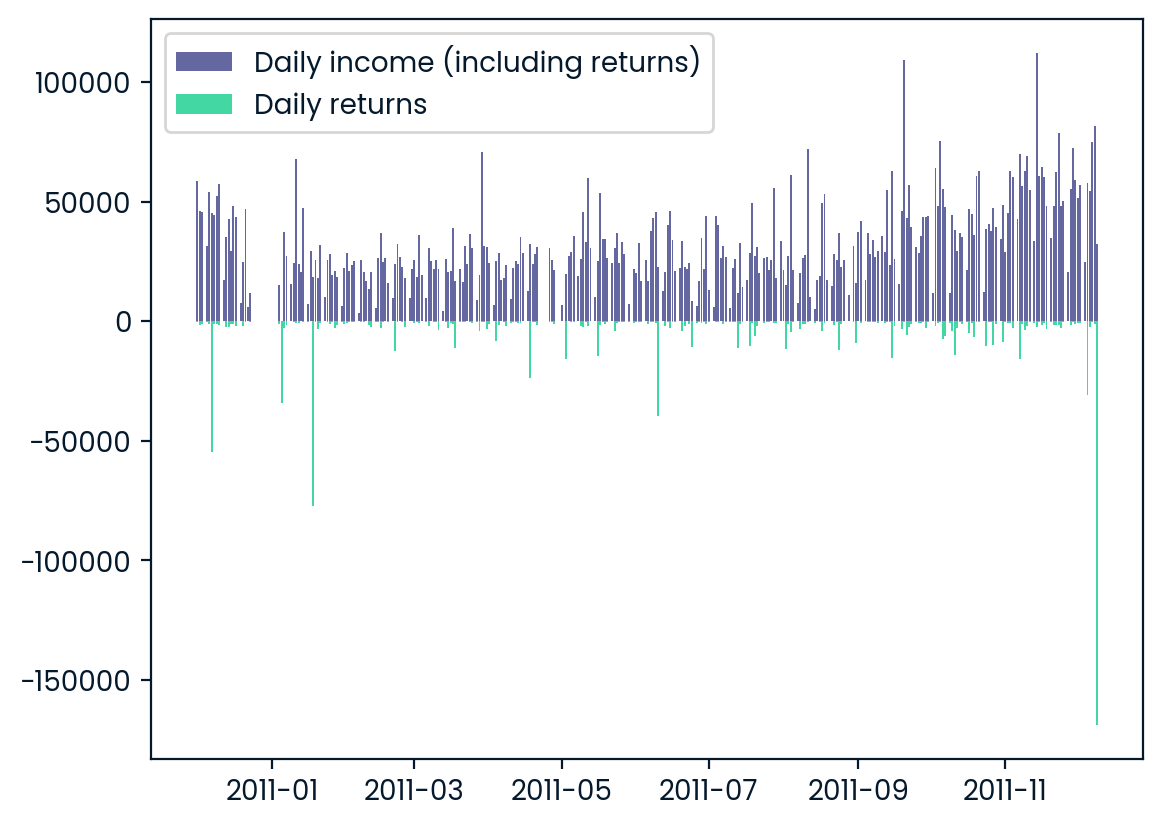

In [18]:
#verify lists' length equality
print(len(date_list)) #305
print(len(item_income)) #305
print(len(return_refunds)) #305

import matplotlib.pyplot as plt 
%matplotlib inline #use matplotlib in notebook for immediate drawing, or import matplotlib_inline
plt.bar(date_list, item_income, label='Daily income (including returns)')
plt.bar(date_list, return_refunds, label='Daily returns')
plt.legend()
plt.show()

In [9]:
df_income = pd.DataFrame()
df_income.index = date_list # setting dataframe index: time(line)
df_income['daily_income'] = item_income
df_income['daily_refunds'] = return_refunds
df_income['day'] = date_list

Plotting all data the in-built graph of the notebook organizes the x axis labels to present year+month.

There are to many datapoints so the graph is crowded, a portion of the data should be plotted only but that is not an option for this built-in plotter.

daily_income  daily_refunds
2010-12-01      58635.56        -325.23
2010-12-02      46207.28       -1541.10
2010-12-03      45620.46       -1323.25
2010-12-05      31383.95        -391.00
2010-12-06      53860.18        -970.28
...                  ...            ...
2011-12-05      57751.32      -30990.64
2011-12-06      54228.37       -2484.84
2011-12-07      75076.22        -362.94
2011-12-08      81417.78       -1077.22
2011-12-09      32131.53     -168789.07

[305 rows x 2 columns]

The plot below is another example of crowded plot, but this time the **_Pandas inbuilt .plot() module_** is used. Applicable for quick data presentation of dataframes, with simple settings and simple look.

<Axes: >

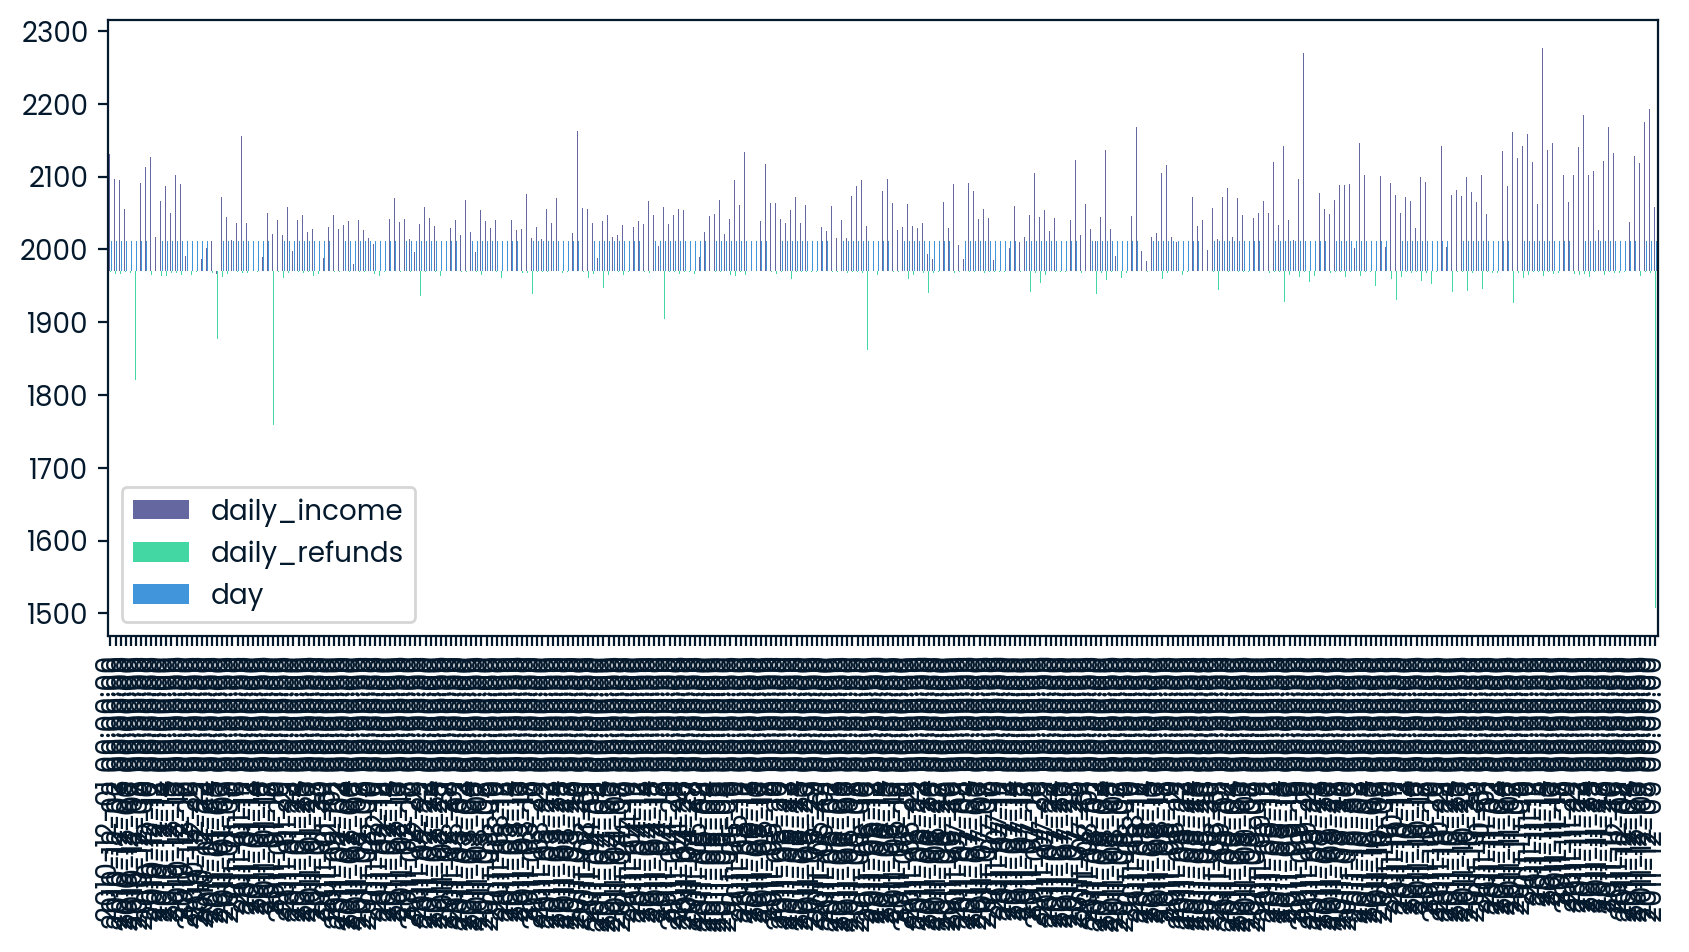

In [10]:
#plot by Pandas Dataframe inbuilt plot - supposing that dataframe index is the time(line)
df_income.plot.bar(figsize=(10, 4))

Create week, month categories, then sum values up in categories.
Month (and year) it is easy, it could be read from the date(time) value either by calculation or by using **datetime.month**.
To determine week could use a conversion:
**datetime.date(yyyy, mm, dd).isocalendar().week** 
But instead of running through df_income data like below (for month and for the weeks)...

In [ ]:
months = [date_list[0].month]
monthly_income = [0]
monthly_refunds = [0]
for index, current_day in enumerate(date_list):
    current_month = current_day.month
    if current_month != months[-1]:
        months.append(current_month) #append new month to list
        monthly_income.append( item_income[index] ) #new month, new sum starts
        monthly_refunds.append( item_refund[index] )
    else:
        # add daily value to last monthly value 
        monthly_income[-1] += item_income[index])
        monthly_income[-1] += item_refund[index])

Here we can use one benefit of Python linked (chained) functions, especially for Pandas DataFrame, such as
- datetime week/month extraction,
- groupby() option,
- aggregation ability (sum()),
- and finally the plot module.

All functions chained in one line of code (for one list of income/refund values).

**Graph of monthly profit (first try)**

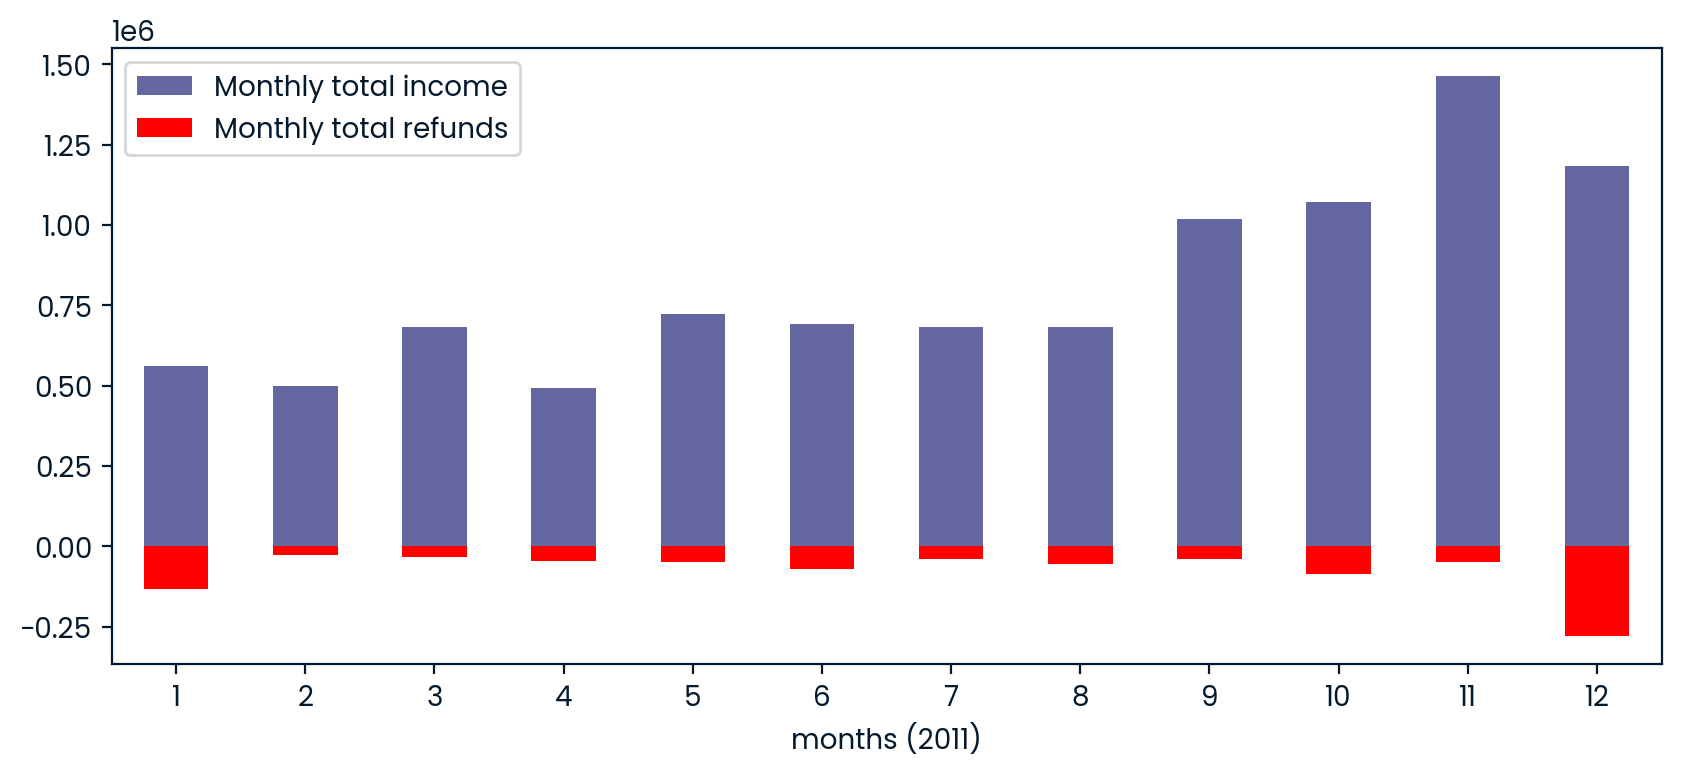

In [34]:
fig, axs = plt.subplots(figsize=(10, 4))

df_income.groupby(df_income.day.dt.month)['daily_income'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Monthly total income')
df_income.groupby(df_income.day.dt.month)['daily_refunds'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Monthly total refunds', color='red')
plt.legend()
plt.xlabel('months (2011)')
plt.show()

**Graph of weekly profit (first try)**

Note: check next plot below

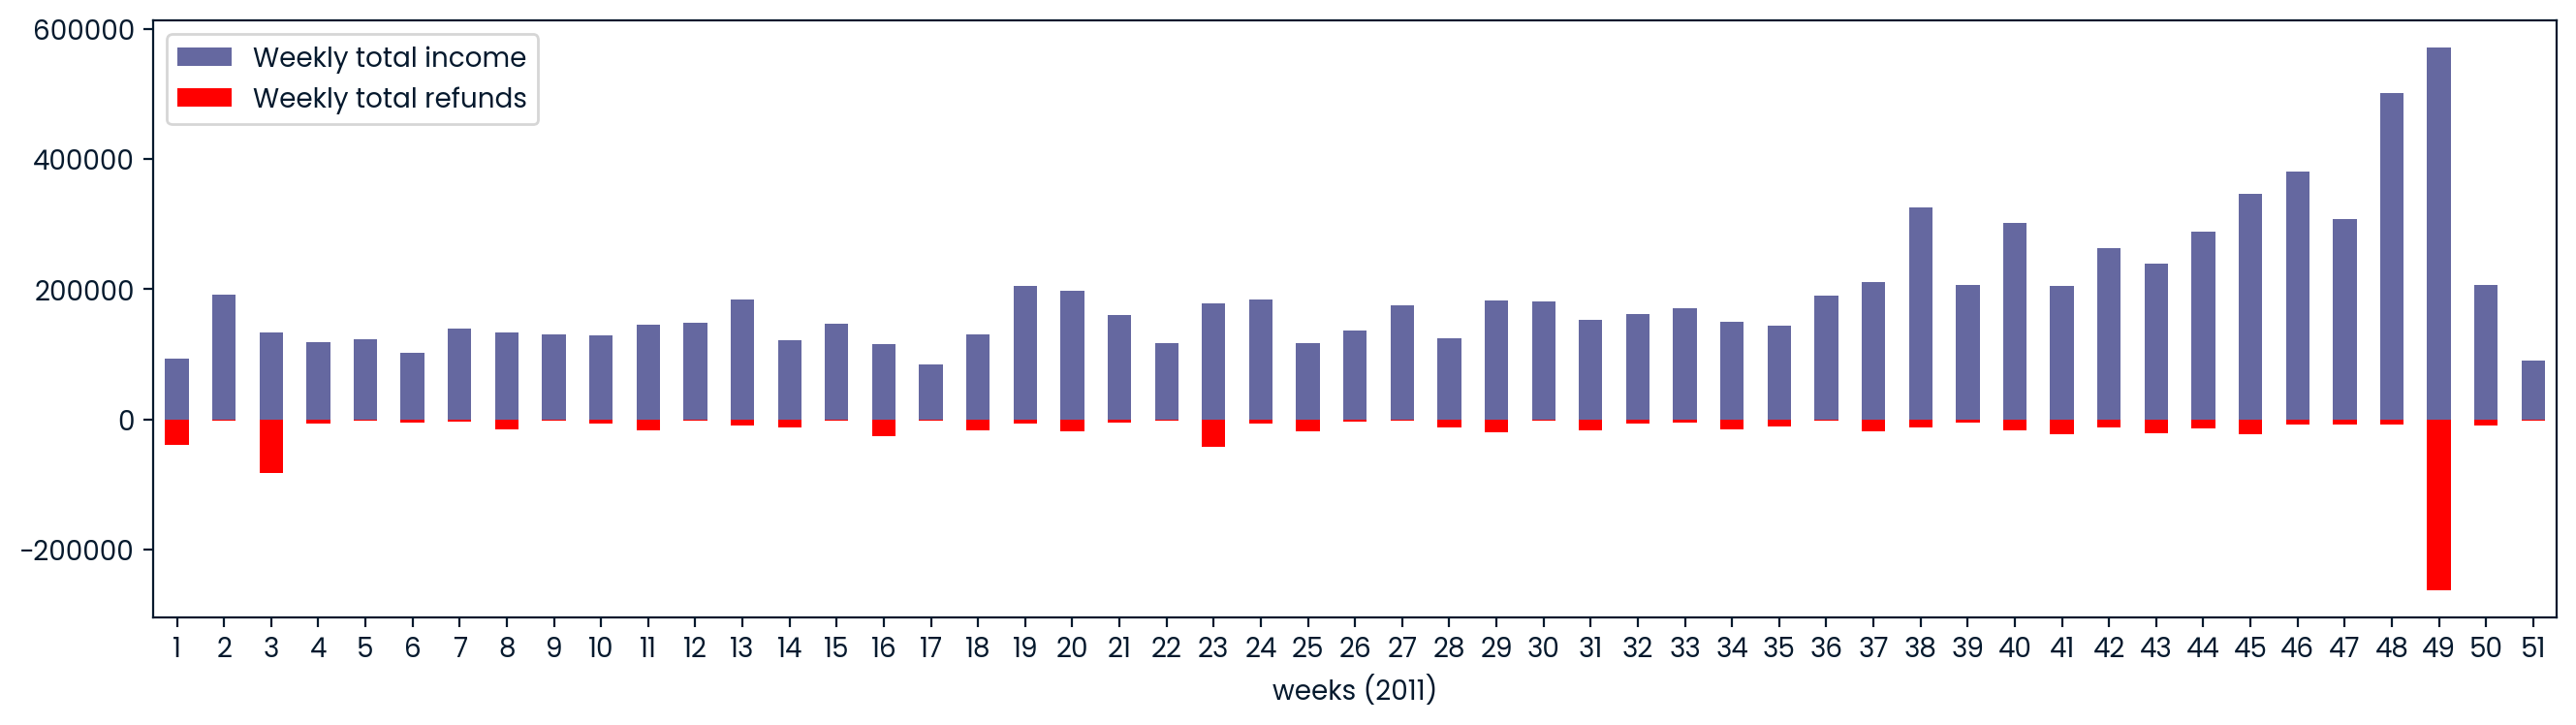

In [39]:
fig, axs = plt.subplots(figsize=(16, 4))

df_income.groupby(df_income.index.isocalendar().week)['daily_income'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Weekly total income')
df_income.groupby(df_income.index.isocalendar().week)['daily_refunds'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Weekly total refunds', color='red')
plt.xlabel('weeks (2011)')
plt.legend()
plt.show()

These plots above did not consider that December (with corresponding weeks) have appeared twice in the timeline.
Let's convert week numbers to be always to digit numbers and attach those to the year (both as strings) to create unique (string) values for both years (2010 and 2011) and the weeks, like '2010w50'.

Specialty; a string like above is created corresponding to year 2010 and week 50. This is important as there are 48-52nd week related registers both for the year 2010 and 2011. If we do not create unique labels for the weekly data it would sum  up data from same week numbers from different years in one entity. These labels are used on the horizontal axis of the graph.

In [50]:
year_values = df_income.index.isocalendar().year #datetime indexed values
week_values = df_income.index.isocalendar().week
year_weak_list = [str(x)+ 'w' + '{:02d}'.format( y ) for x,y in zip(year_values, week_values)] #format 1 digit weeks -> 2 digits!
df_income['year_week'] = year_weak_list
df_income['year_week'].head()

2010-12-01    2010w48
2010-12-02    2010w48
2010-12-03    2010w48
2010-12-05    2010w48
2010-12-06    2010w49
Name: year_week, dtype: object

**Corrected weekly profit graph**

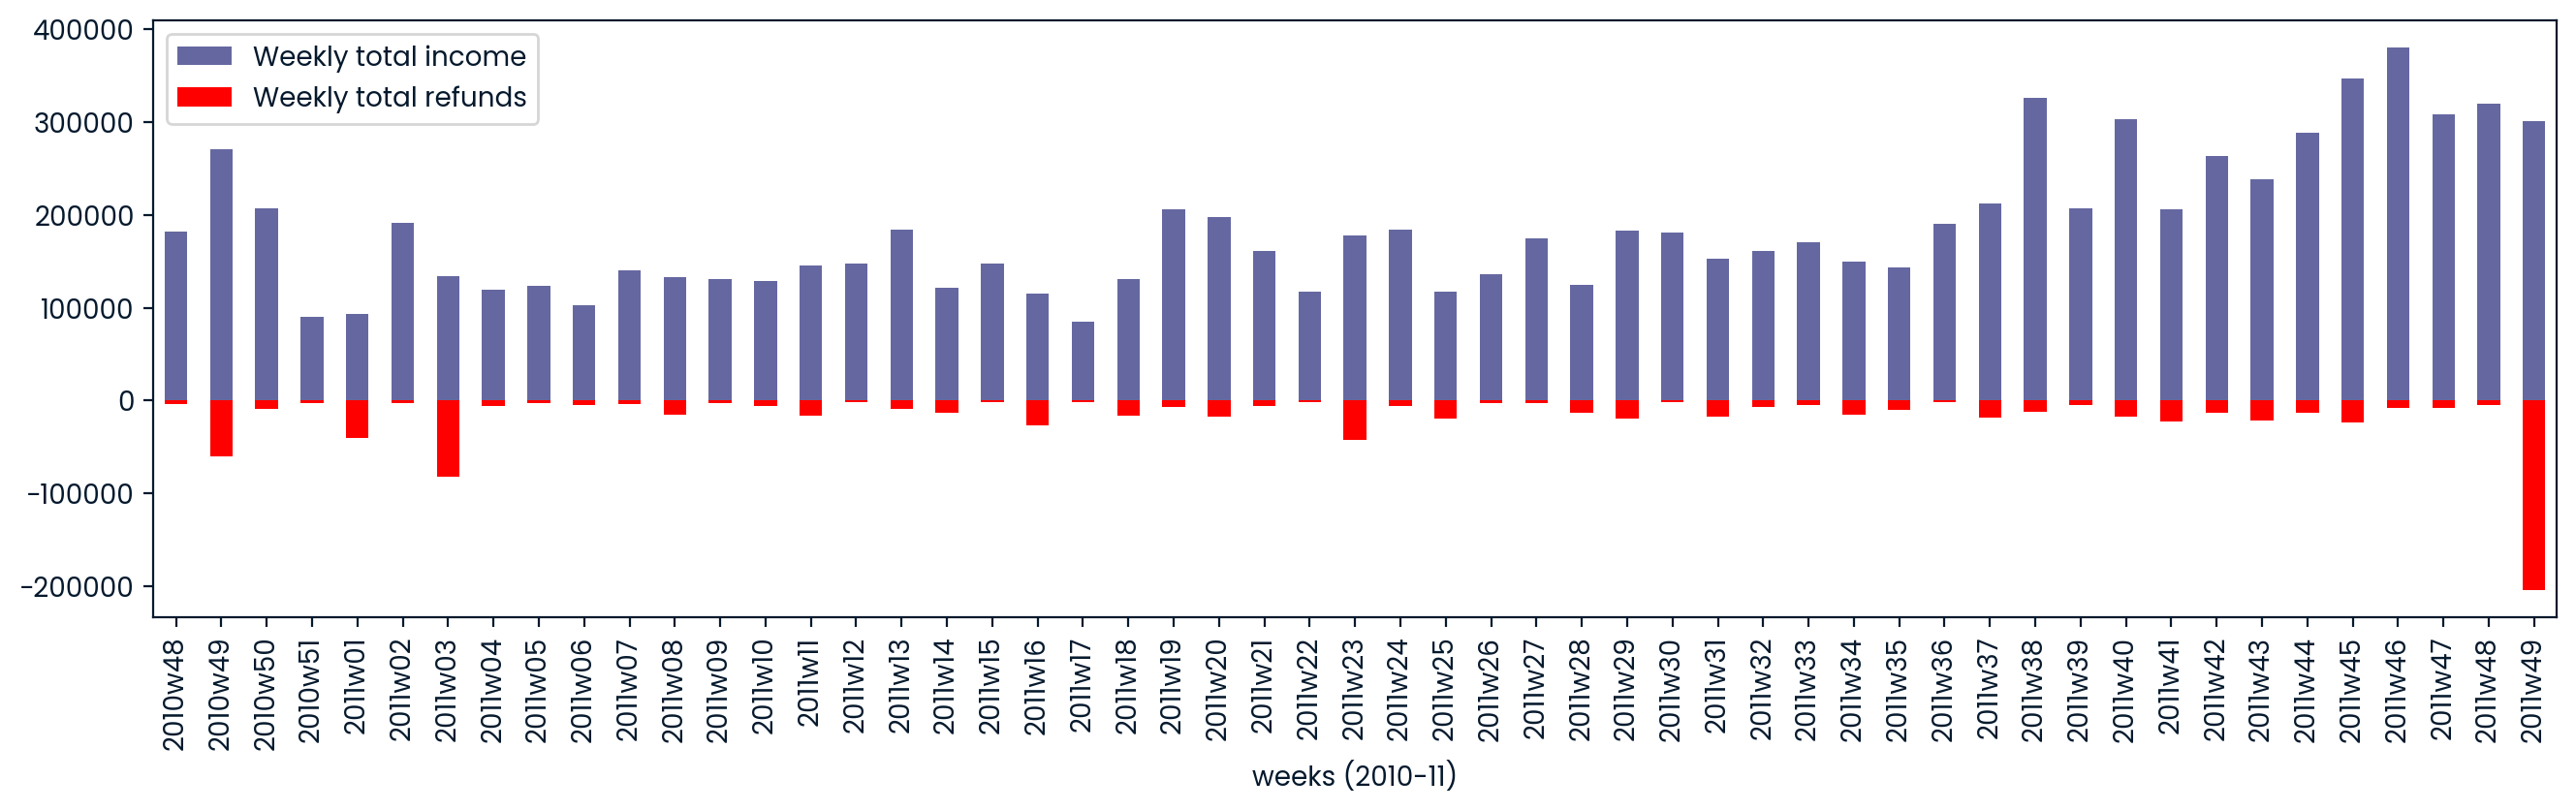

In [51]:
fig, axs = plt.subplots(figsize=(16, 4))
df_income.groupby(df_income.year_week)['daily_income'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Weekly total income')
df_income.groupby(df_income.year_week)['daily_refunds'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Weekly total refunds', color='red')
plt.xlabel('weeks (2010-11)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

... similarly here you find the corrected plot for the months:

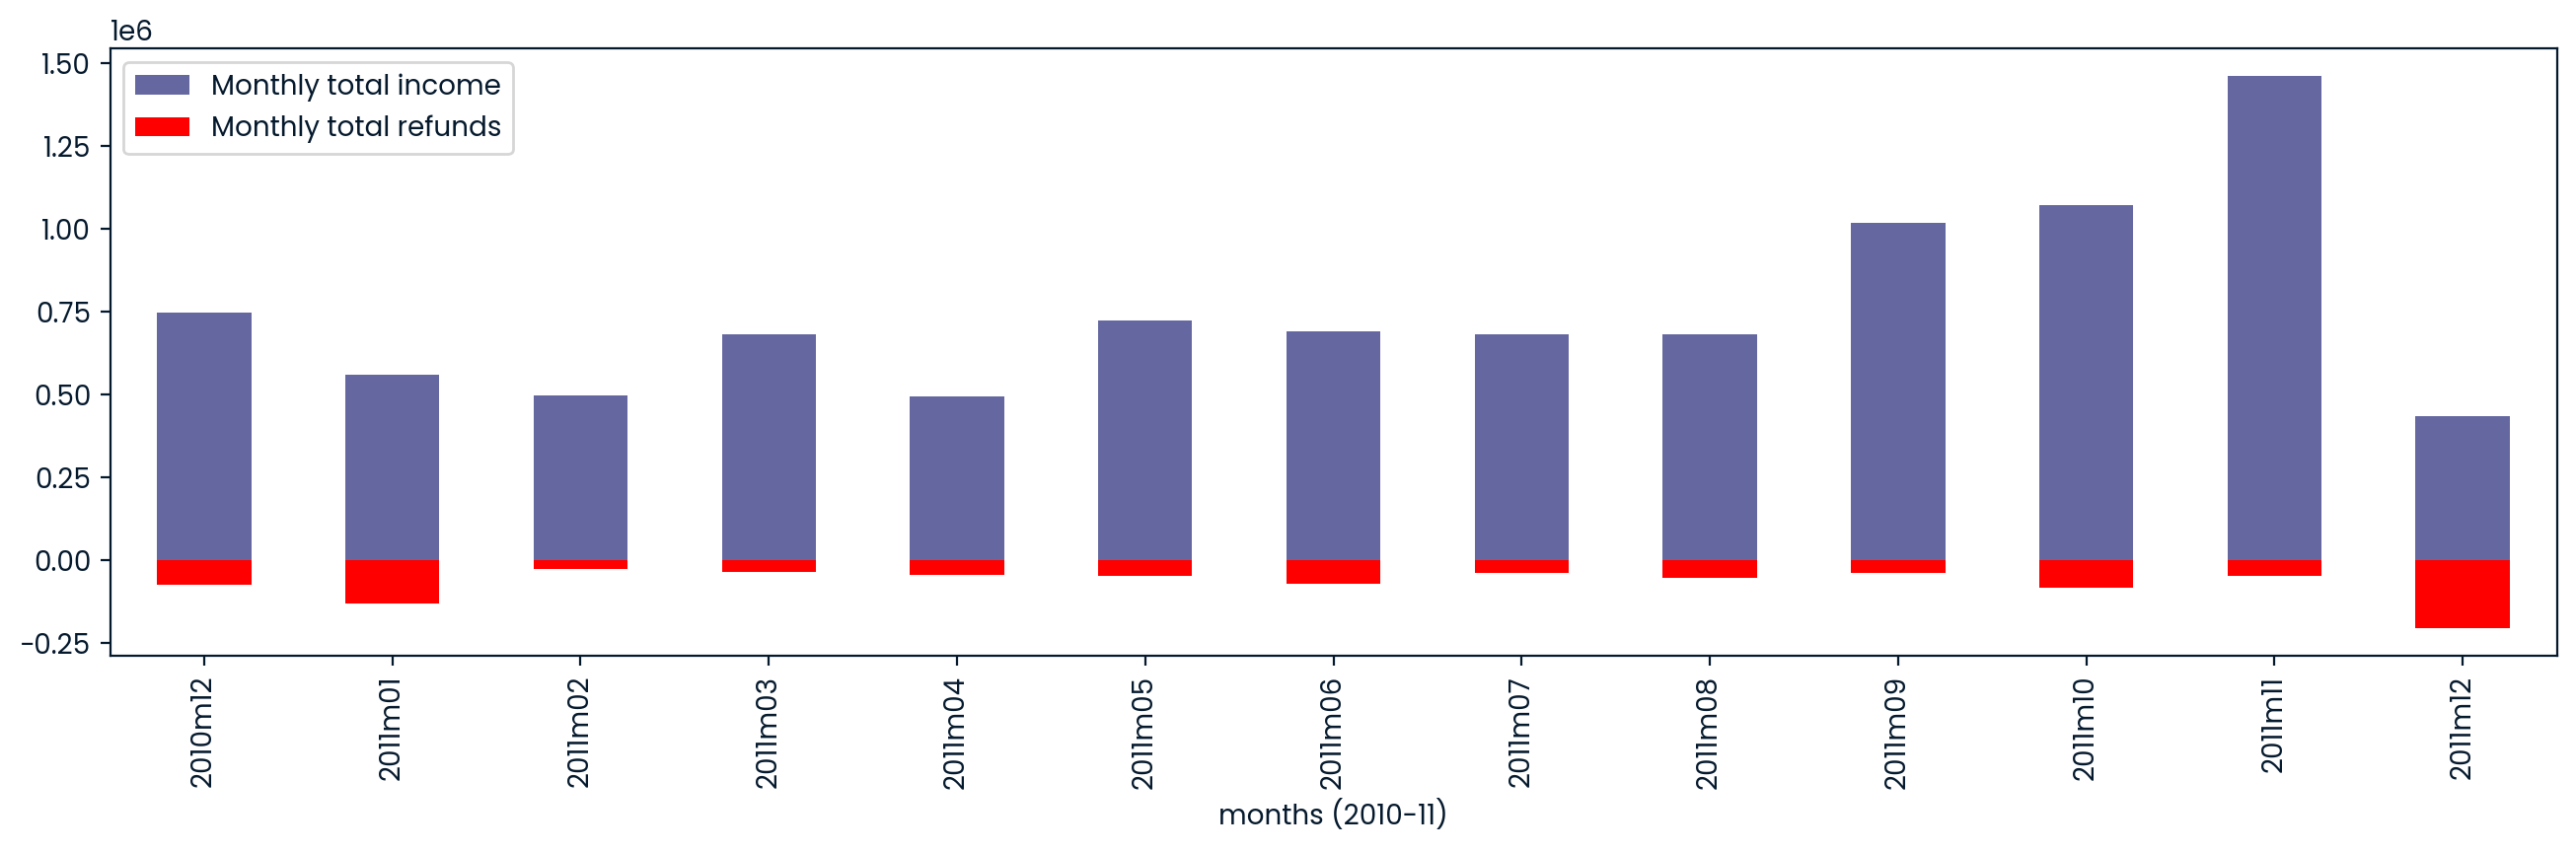

In [54]:
year_values = df_income.index.isocalendar().year #datetime indexed values
month_values = df_income.day.dt.month # or df_income.index.isocalendar().month
df_income['year_months'] = [str(x)+ 'm' + '{:02d}'.format( y ) for x,y in zip(year_values, month_values)] #format 1 digit months -> 2 digits!

fig, axs = plt.subplots(figsize=(16, 4))
df_income.groupby(df_income.year_months)['daily_income'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Monthly total income')
df_income.groupby(df_income.year_months)['daily_refunds'].sum().plot(
    kind='bar', rot=0, ax=axs, label ='Monthly total refunds', color='red')
plt.xlabel('months (2010-11)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Create subset of data about **UK** customers.
First let's get some additional information regarding the question: list of countries in the dataset.

In [3]:
retail.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
uk_count = len(retail[retail.Country=='United Kingdom'])
print('purchases with UK origin: %d (%4.1f ' % (uk_count, uk_count/541909*100) + '% of total)' )

purchases with UK origin: 495478 (91.4 % of total)


It means that the major part of income is from UK citizens so the graph will not look much different, but to answer precisely the question let's select the UK originated data from the full dataset.

Now, calculate the profit as total of purchase and return related amounts, so the sum of Quantity\*UnitPrice of each (UK) registers. Also extract date (year,month,date) information from date strings, leaving the hour and minute as those do not count in weekly, monthly financial statement.

Specialty; a string like '2010m01' is created corresponding to year 2010 and January as 1st month. This is important as there are December related registers both for the year 2010 and 2011 and not creating unique labels for the monthly data would sum the data of December up in one entity. These labels are used on the horizontal axis of the graph.

In [8]:
from datetime import datetime
retail2 = retail[retail.Country == 'United Kingdom'].copy() # copy to keep original df intact
retail2['uk_profit'] = [num * unitprice for num, unitprice in zip(retail2.Quantity, retail2.UnitPrice)]
retail2['timeline'] = [datetime.strptime(t.split(' ')[0], '%m/%d/%y') for t in retail2.InvoiceDate]
retail2['year_months_list'] = [str(x)+ 'm' + '{:02d}'.format( y ) for x,y in zip(retail2.timeline.dt.year, retail2.timeline.dt.month)] #format 1 digit months -> 2 digits!

In [24]:
retail3 = pd.DataFrame()
retail3['profit'] = retail2.groupby(retail2.year_months_list)['uk_profit'].sum() #timeline.dt.month
#retail3['timeline'] = retail2.groupby(retail2.year_months_list)['timeline']
# .plot( kind='bar', rot=0, ax=axs, label ='Monthly total income')
retail3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2010m12 to 2011m12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   profit  13 non-null     float64
dtypes: float64(1)
memory usage: 208.0+ bytes


In [26]:
retail3

profit
year_months_list             
2010m12            676742.620
2011m01            434308.300
2011m02            408247.910
2011m03            559707.390
2011m04            442254.041
2011m05            596459.860
2011m06            554478.350
2011m07            565479.841
2011m08            539130.500
2011m09            862018.152
2011m10            877438.190
2011m11           1282805.780
2011m12            388735.430

## Conclusions #2
1. As December approaches the income (and the number of purchases, data not shown) increases, from the 37th week (September), doubles compared to an average value over the year. Family events in December may cause this increase. It also shows that people are thinking ahead of buying presents for the end of the year.
2. Regarding refunds December and January have increased amounts and it is highly due to returned - doubled, wrong or not liked - gifts received in December.

# Problem 3) Order size comparison.

Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

Some basic information extracted from the dataset:
- country number
- country names

In [13]:
print('Number of countries: ' + str(len(retail.Country.unique()) ))
retail.Country.unique()

Number of countries: 38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

We could throw away not required columns and keep Quantity data only, but let's keep all column in the datasets, which fit to the conditions of
- products ordered either from UK or from outside of UK (Non-UK) and (!)
- are related to purchases not to returns, so which have positive Quantity values

In [6]:
uk_retails_purchases = retail[(retail.Country == 'United Kingdom') & (retail.Quantity > 0) ]
nonuk_retails_purchases = retail[(retail.Country != 'United Kingdom') & (retail.Quantity > 0) ]

Further information on purchases and the filtered dataset

In [7]:
print('Total register count: 541909')
print('UK related register number: ' + str(retail.Country[retail.Country == 'United Kingdom'].count()))
uk_purchase_count = len(uk_retails_purchases)
print('UK related purchase number: ' + str(uk_purchase_count))
nonuk_purchase_count = len(nonuk_retails_purchases)
print('Other country related purchase number: ' + str(nonuk_purchase_count))
print('Ratio of Non-UK over UK purchases: ' +str('{:2.1f}'.format(nonuk_purchase_count/uk_purchase_count * 100)) + '%')
nonuk_retials_purchases.info()

Total register count: 541909
UK related register number: 495478
UK related purchase number: 486286
Other country related purchase number: 44999
Ratio of Non-UK over UK purchases: 9.3%
<class 'pandas.core.frame.DataFrame'>
Index: 44999 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    44999 non-null  object 
 1   StockCode    44999 non-null  object 
 2   Description  44999 non-null  object 
 3   Quantity     44999 non-null  int64  
 4   InvoiceDate  44999 non-null  object 
 5   UnitPrice    44999 non-null  float64
 6   CustomerID   43579 non-null  float64
 7   Country      44999 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [8]:
nonuk_retails_purchases

InvoiceNo StockCode  ... CustomerID  Country
26        536370     22728  ...    12583.0   France
27        536370     22727  ...    12583.0   France
28        536370     22726  ...    12583.0   France
29        536370     21724  ...    12583.0   France
30        536370     21883  ...    12583.0   France
...          ...       ...  ...        ...      ...
541904    581587     22613  ...    12680.0   France
541905    581587     22899  ...    12680.0   France
541906    581587     23254  ...    12680.0   France
541907    581587     23255  ...    12680.0   France
541908    581587     22138  ...    12680.0   France

[44999 rows x 8 columns]

A simple way of basic statistical analysis of the datasets is availabe using [stats.describe]([url](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html)) function of **Scipy** module. 

In [9]:
from scipy.stats import describe
uk_retails_purchases.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [10]:
nonuk_retails_purchases.Quantity.describe()

count    44999.000000
mean        20.604058
std         47.310998
min          1.000000
25%          5.000000
50%         12.000000
75%         18.000000
max       2400.000000
Name: Quantity, dtype: float64

We can compare mean values of the two dataset, but the visible difference (factor of ~2) does not correspond to (statistically) significant difference! (UK ~9.7 and Non-UK ~20.6)

Statisctical probe should be applied!

**_T-test_** for the means of two independent samples of scores using [ttest_ind()]([url](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)) function of Scipy module. 

In [11]:
from scipy.stats import ttest_ind

v1 = uk_retails_purchases.Quantity.to_numpy()
v2 = nonuk_retails_purchases.Quantity.to_numpy()
res = ttest_ind(v1, v2)
print(res)

TtestResult(statistic=-14.06825612910978, pvalue=6.063726842856569e-45, df=531283.0)


## Conclusion #3

As degrees of freedom (df) is high therefore the test result is reliable, which states that the null hypothesis is highly unlikely (due to the fact that the pvalue is extremely low).

What is/was the null hypothesis, by the way?
null hypothesis: 'This test assumes that the populations have identical variances by default'.

What we can state based on the test result is that the UK and Non-UK order sizes are not the same. Comparing the mean values: UK ~9.7 and Non-UK ~20.6 we can state that, right, the Non-UK order sizes are significantly higher!
This is further proven by the statistic value, by being negative it indicates that **the second dataset : Non-UK order sizes, has (significantly) larger mean.**